Running the original code provided by Bill with the .csv provided as well.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td

In [25]:
file_path = r'C:/Users/srubin/OneDrive - INTERA Inc/Lisbon/MODFLOW_Visualization/l210610d/l210610d_targets.xlsx'
refDate = dt(1990, 4, 1)  #so, the Time column is relative to starting at 04/01/1990 + days

targ = {}

In [26]:
xls.head()

,Name,Time,X,Y,Layer,Observed,Computed,Weight,Group,Residual
0,D-3,3308.0,2.275016e+06,1.043245e+07,12.0,6551.10,6512.667621,1.0,1.0,38.432379
1,D-3,4150.0,2.275016e+06,1.043245e+07,12.0,6541.81,6515.989091,1.0,1.0,25.820909
2,D-3,4413.0,2.275016e+06,1.043245e+07,12.0,6541.96,6515.767197,1.0,1.0,26.192803
3,DH-10,543.0,2.274821e+06,1.043232e+07,12.0,6503.70,6509.955700,1.0,1.0,-6.255700
4,DH-10,928.0,2.274821e+06,1.043232e+07,12.0,6502.70,6510.285647,1.0,1.0,-7.585647


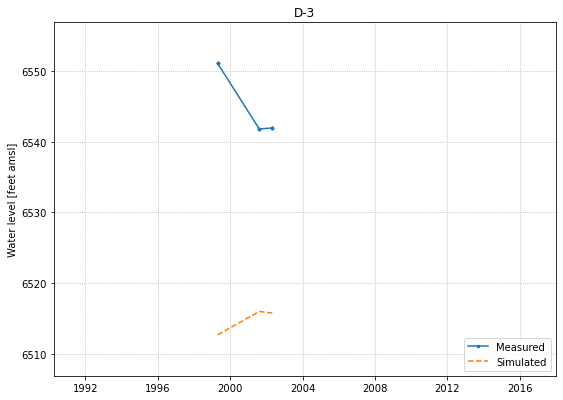

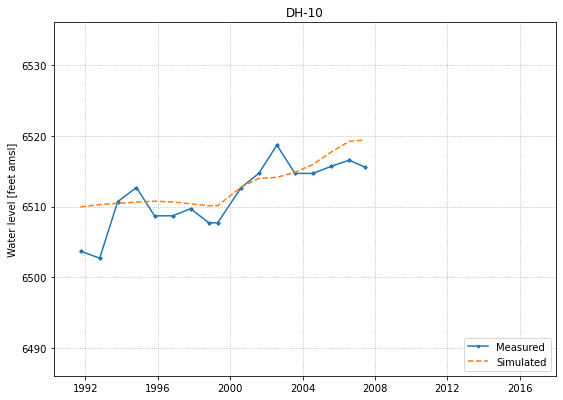

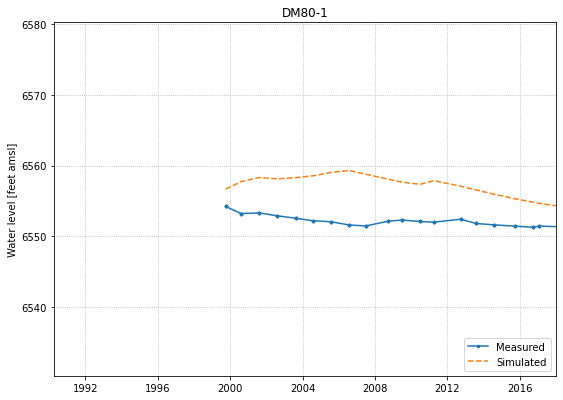

6501.520012 6551.520012


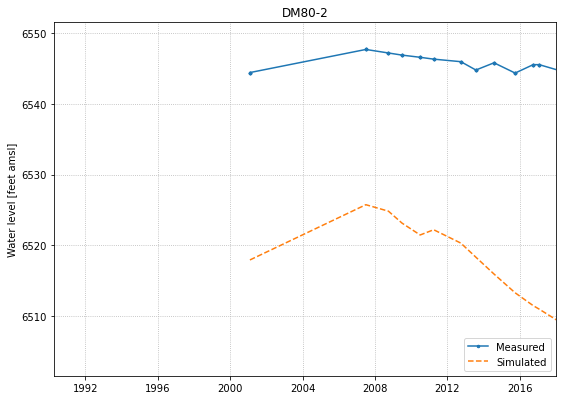

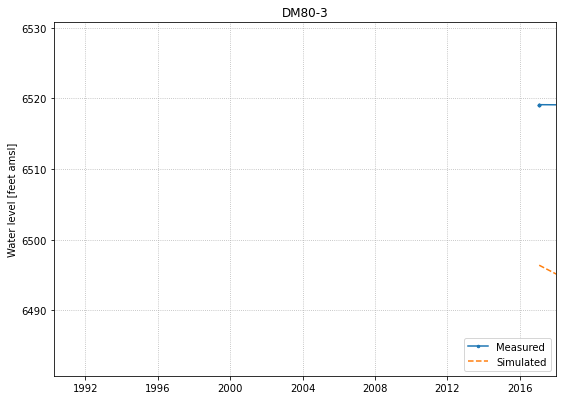

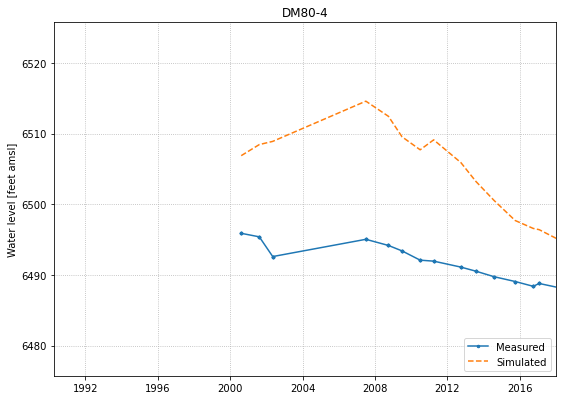

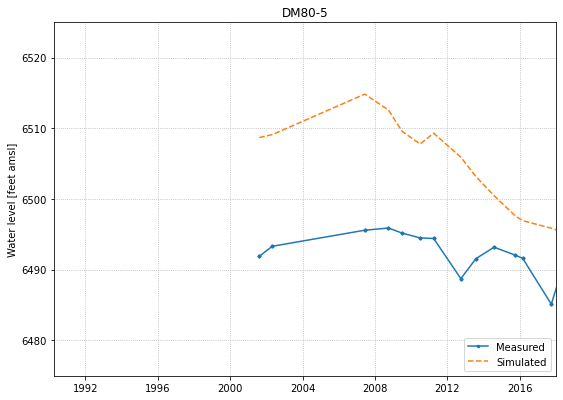

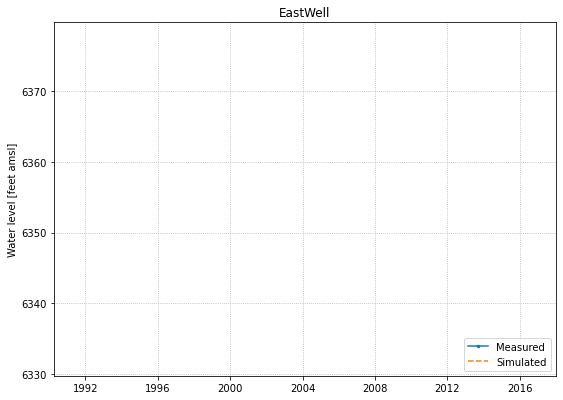

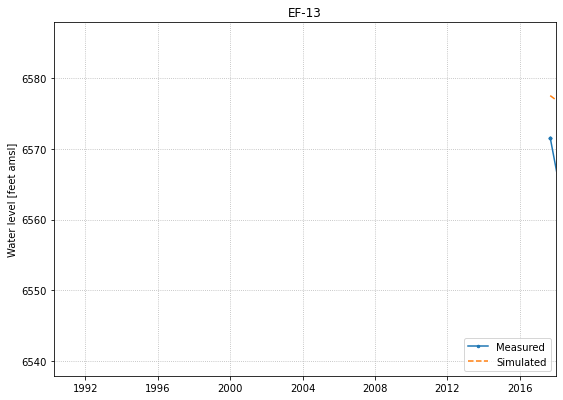

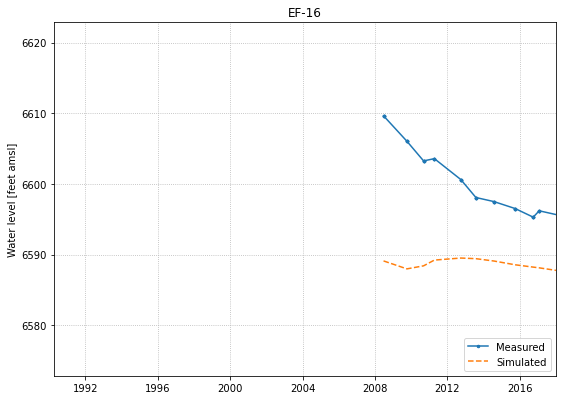

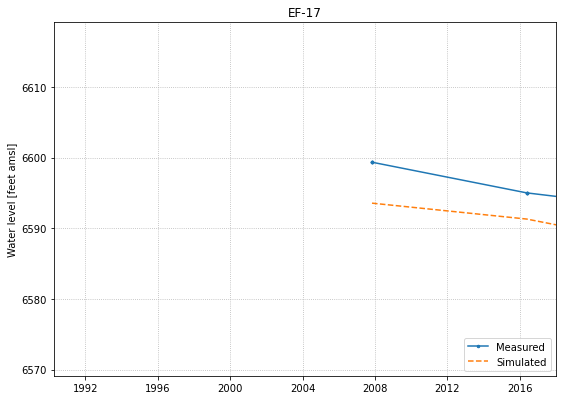

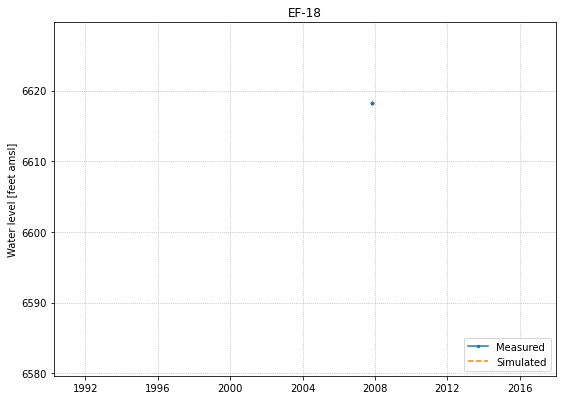

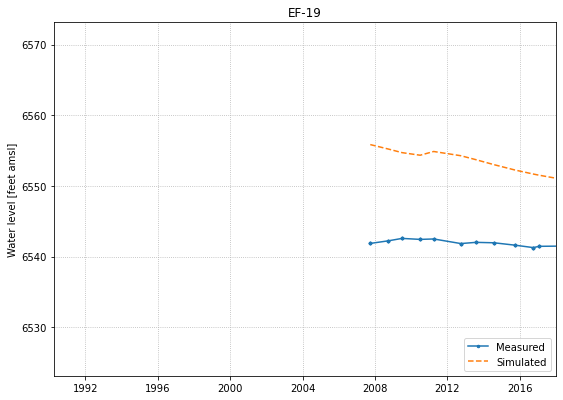

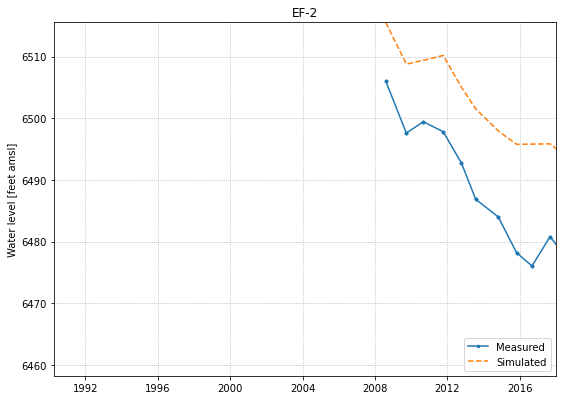

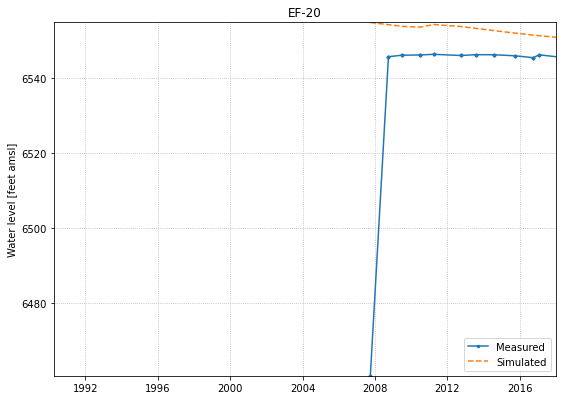

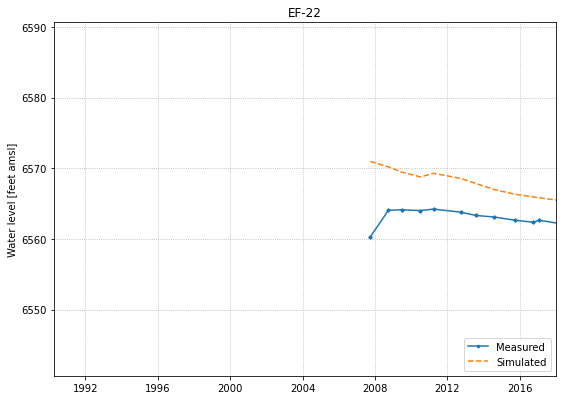

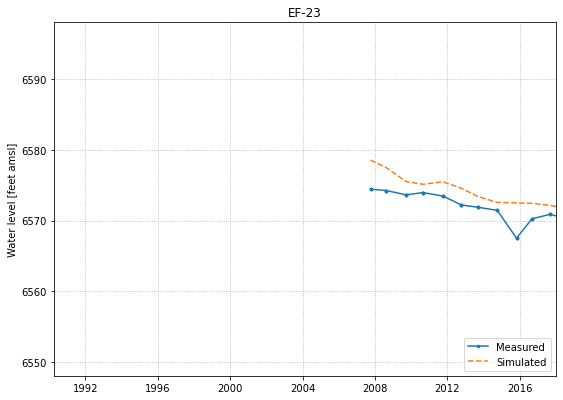

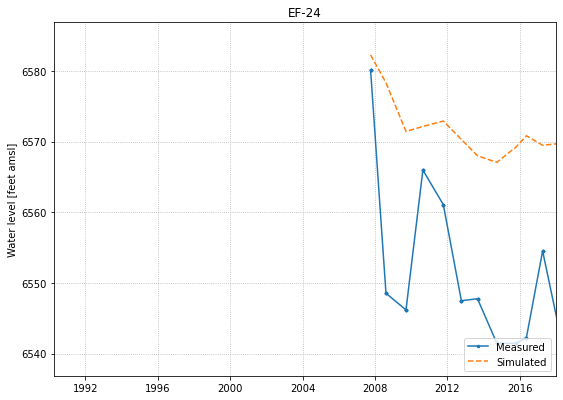

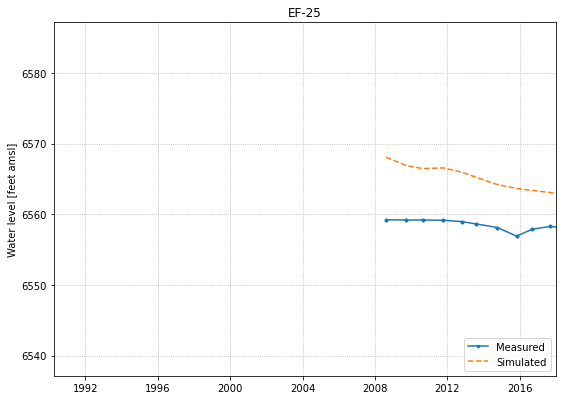

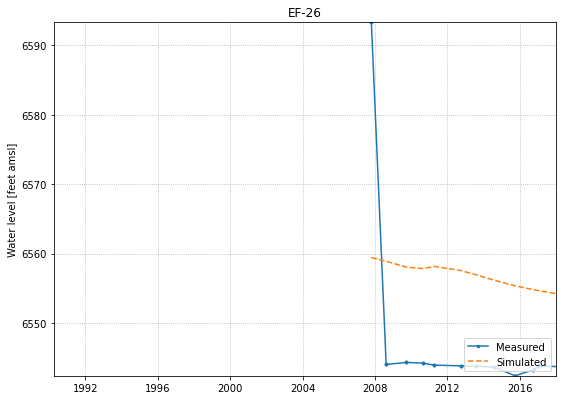

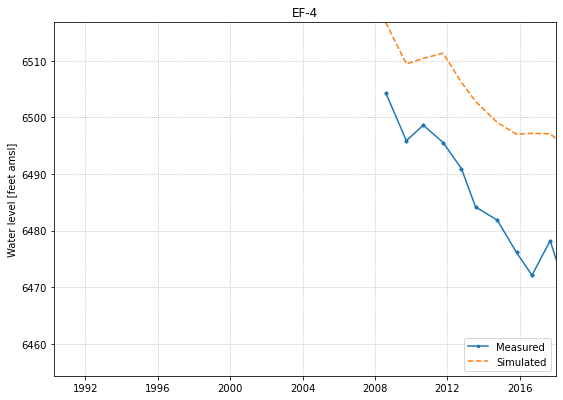

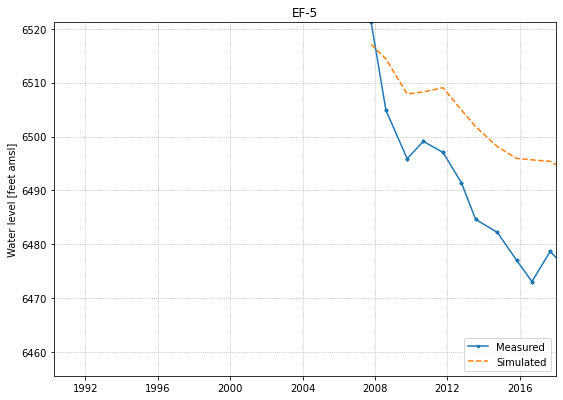

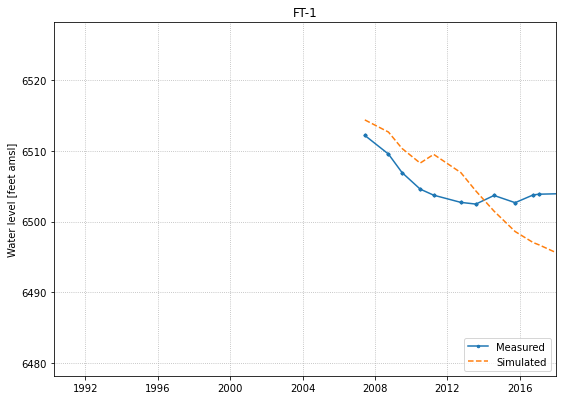

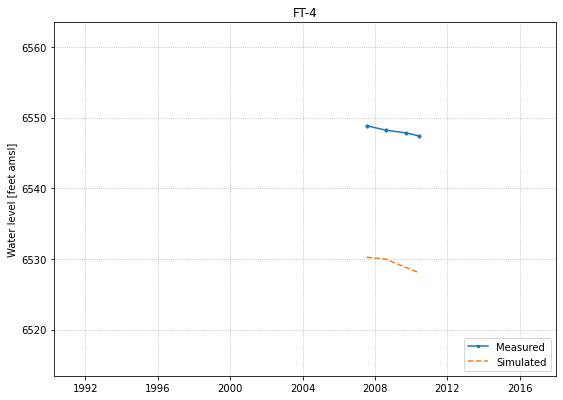

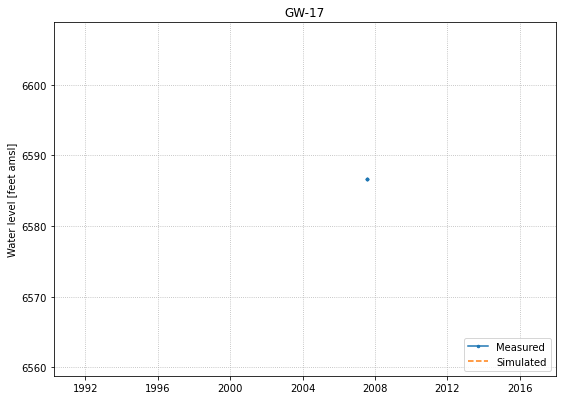

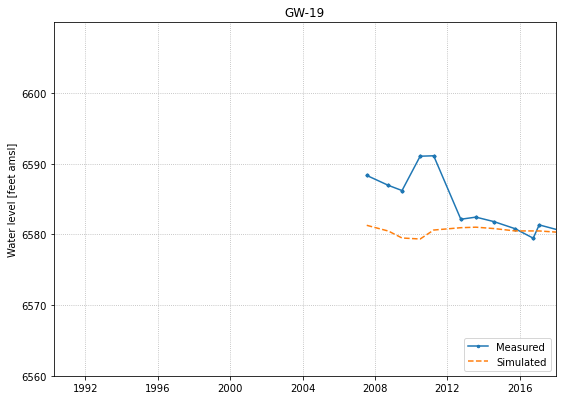

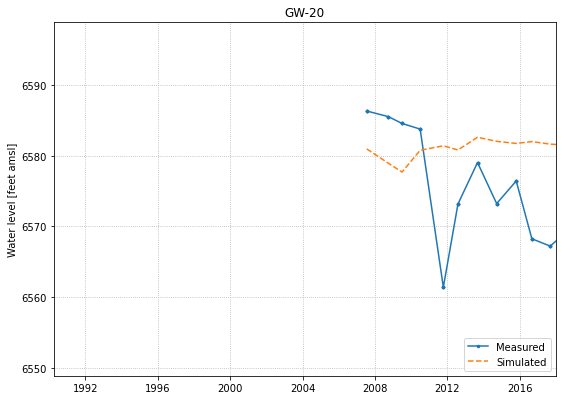

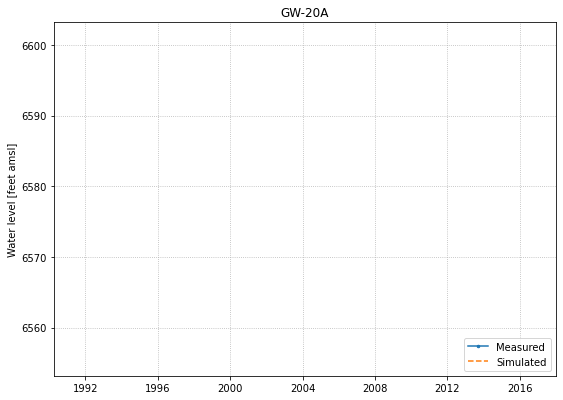

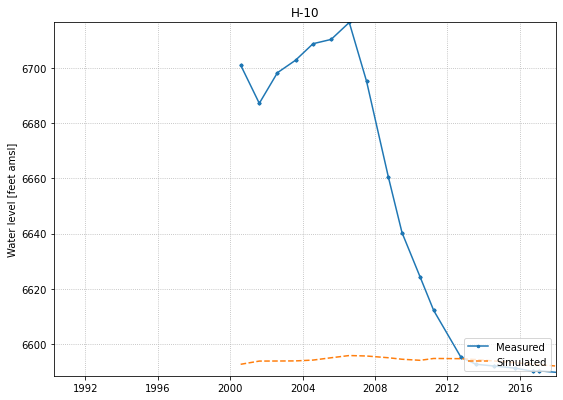

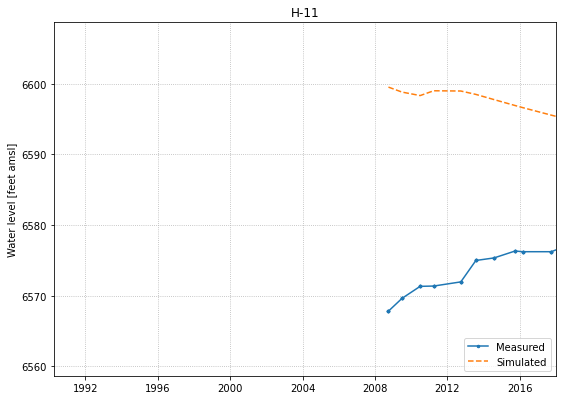

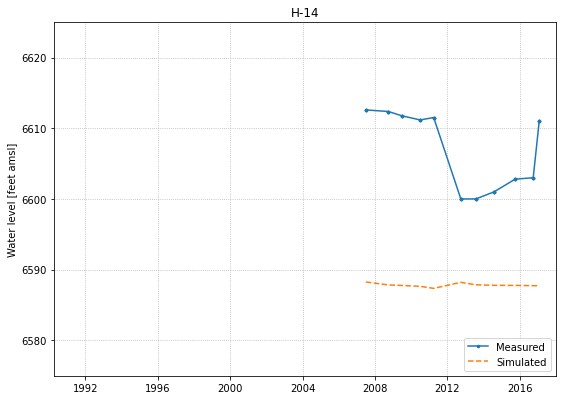

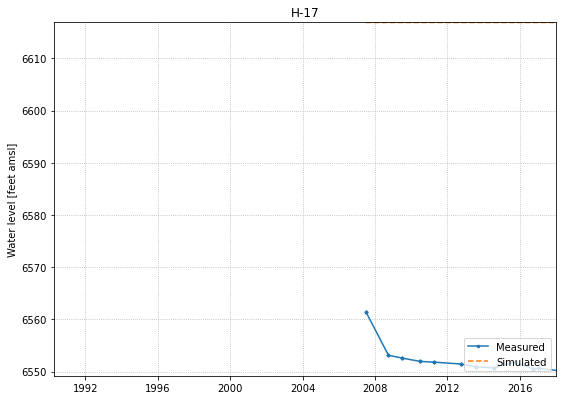

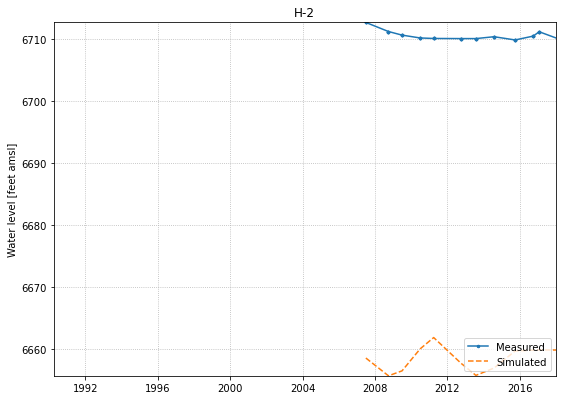

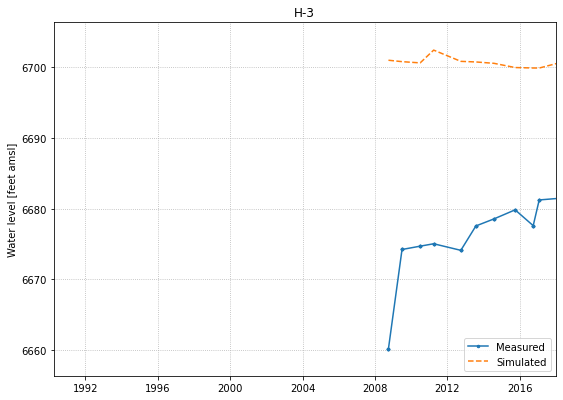

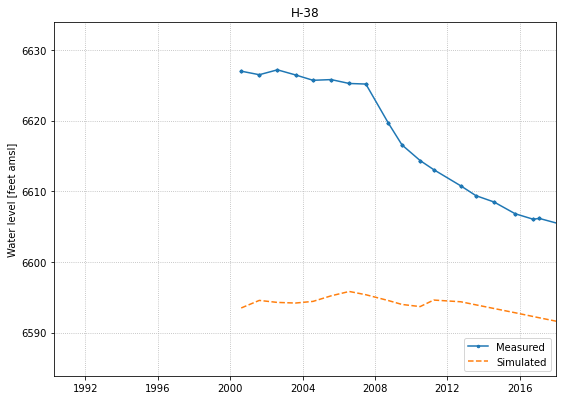

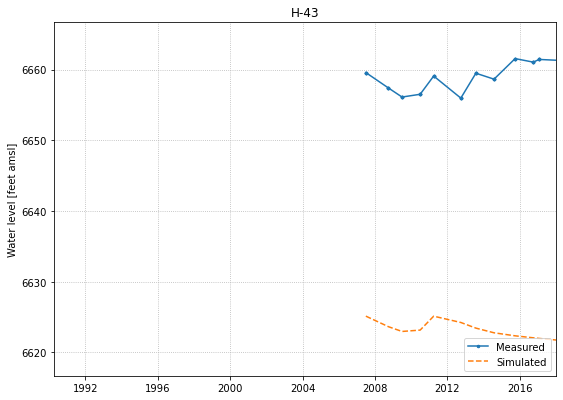

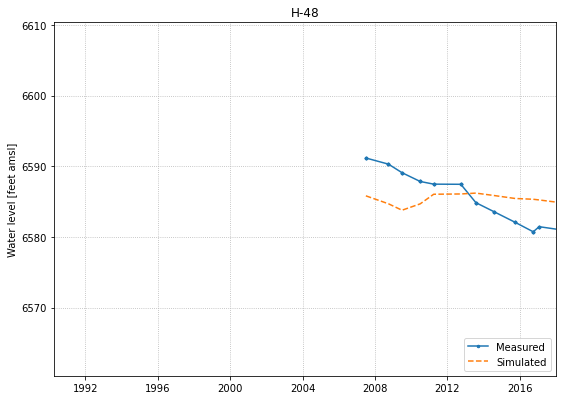

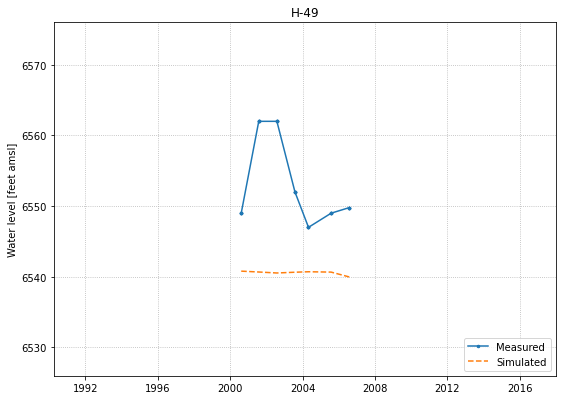

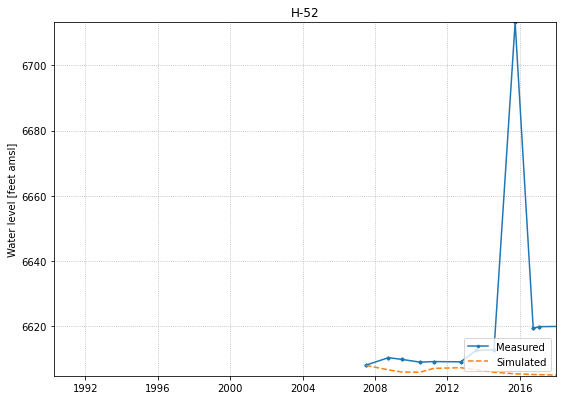

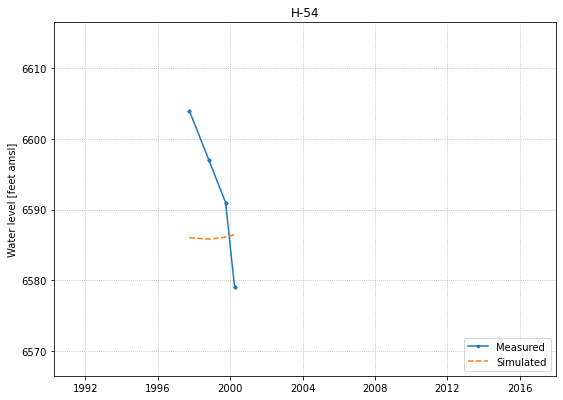

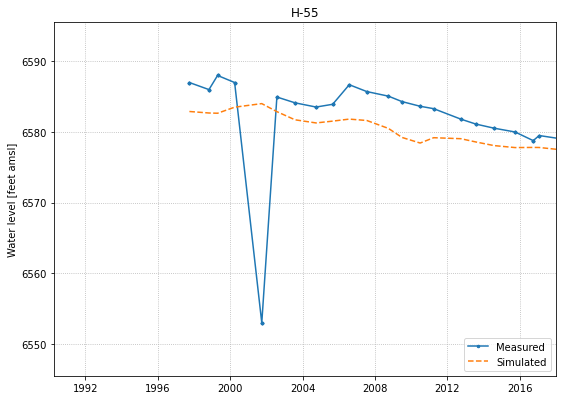

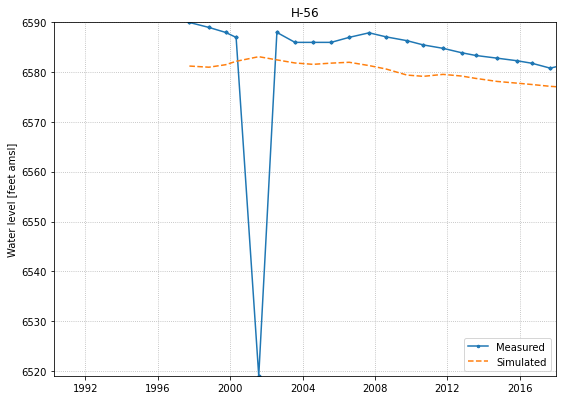

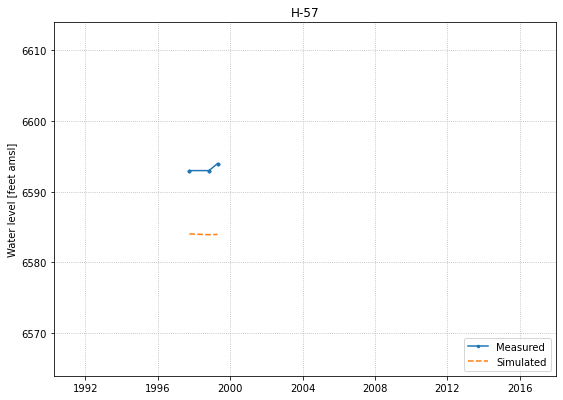

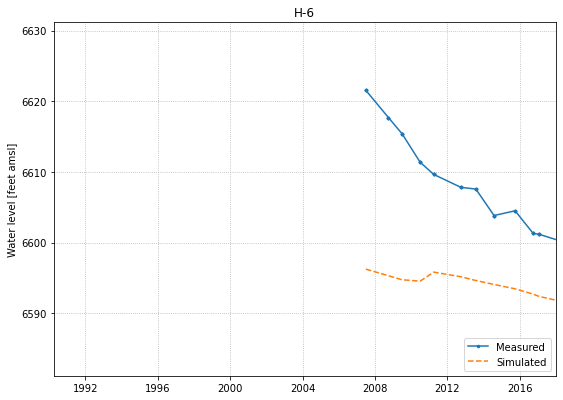

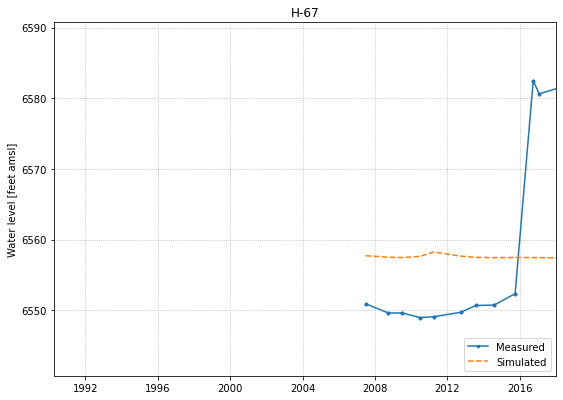

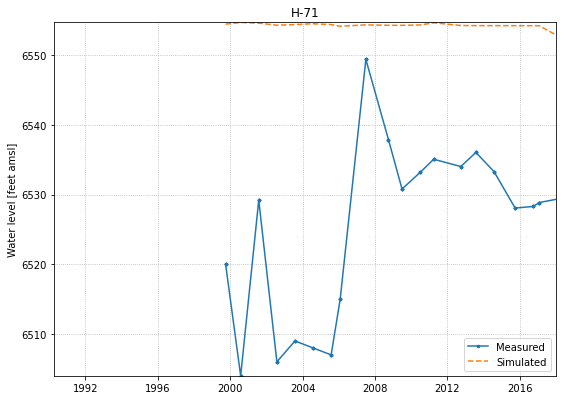

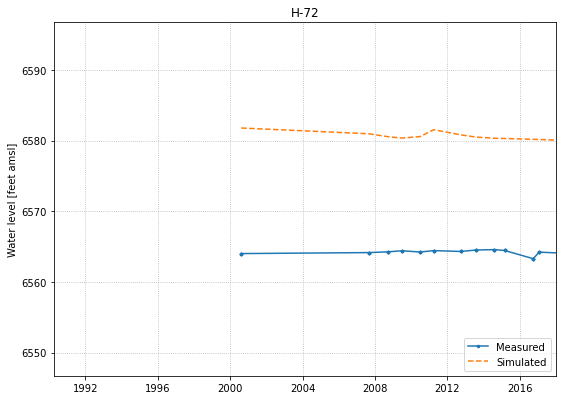

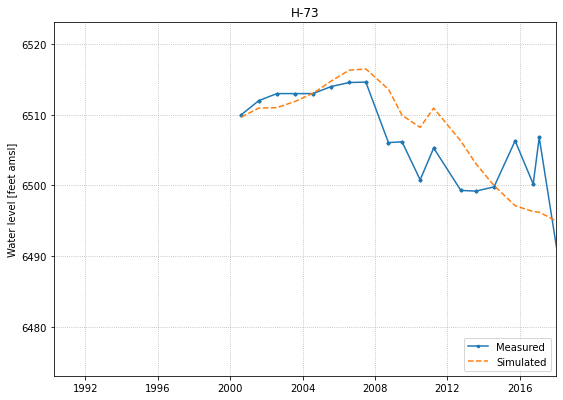

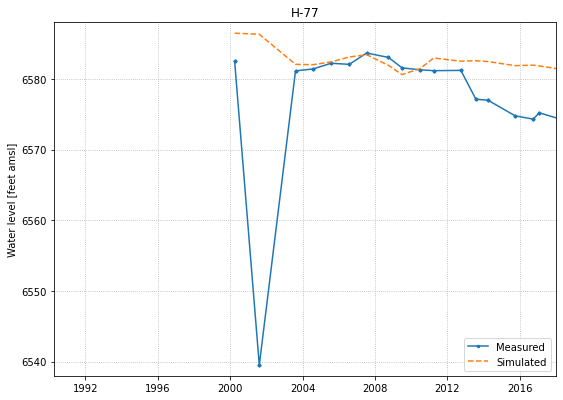

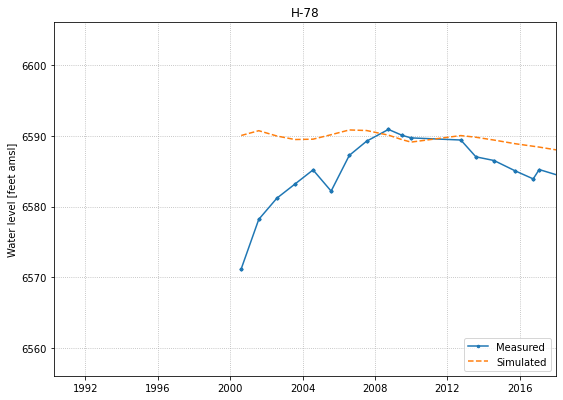

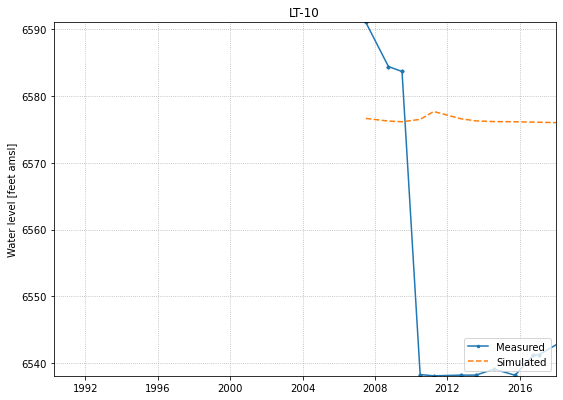

KeyboardInterrupt: 

In [30]:

for r in xls.values:
    if r[0].startswith('Residual'): break
    w = r[0].replace('/','-')
    targ.setdefault(w, [])
    targ[w].append((refDate+td(days=r[1]),r[5],r[6]))

for k, v in targ.items():
    dates, obs, sim = zip(*sorted(v))
    fig, ax = plt.subplots(figsize=(9,6.5))
    ax.set_title(k)
    ax.grid(ls=':')
    ax.plot(dates, obs, label='Measured', marker='o', ms=2.5)
    ax.plot(dates, sim, label='Simulated', ls='--')
    ax.set_xlim(refDate, dt(2018,1,1))
    rng = max(obs+sim) - min(obs+sim)
    if rng < 50:
        llim = min(obs+sim) - (50-rng)*.5
        ulim = max(obs+sim) + (50-rng)*.5
    else:
        llim = min(obs+sim)
        ulim = max(obs+sim)
    if k == 'DM80-2': print(llim, ulim)
    ax.set_ylim(llim, ulim)
    ax.set_ylabel('Water level [feet amsl]')
    ax.legend(loc='lower right')
    #plt.savefig('test',dpi=300)
    plt.show()